Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


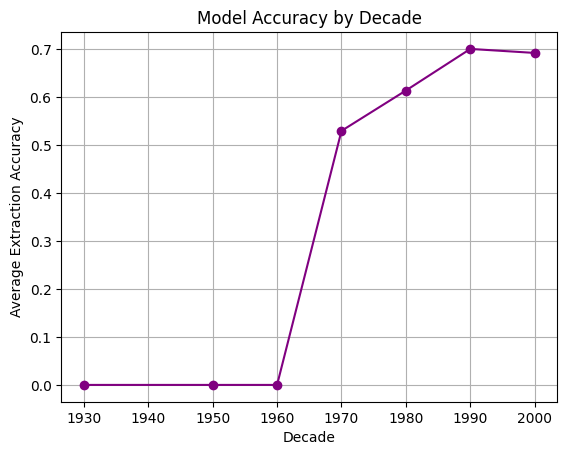

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
data_path = "/content/drive/My Drive/Filtered_Scaled_Data_with_Original_Values.xlsx"
df = pd.read_excel(data_path)

# Convert 'Contract Date' to datetime and then to decades
df["Decade"] = (pd.to_datetime(df["Contract Date"]).dt.year // 10) * 10

# Calculate average extraction accuracy by decade
decade_accuracy = df.groupby("Decade")["Extraction Accuracy"].mean()

# Plot the accuracy by decade
plt.plot(decade_accuracy.index, decade_accuracy.values, marker="o", color="purple")
plt.title("Model Accuracy by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Extraction Accuracy")
plt.grid(True)
plt.savefig("/content/drive/My Drive/accuracy_by_decade.png")  # Save the plot to Google Drive
plt.show()


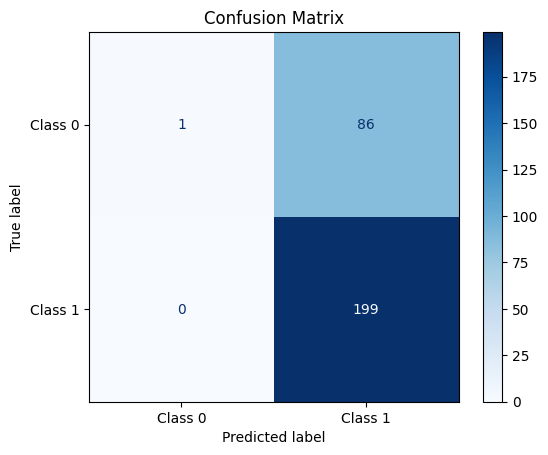

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix values (example from your results)
confusion_matrix = np.array([[1, 86], [0, 199]])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()




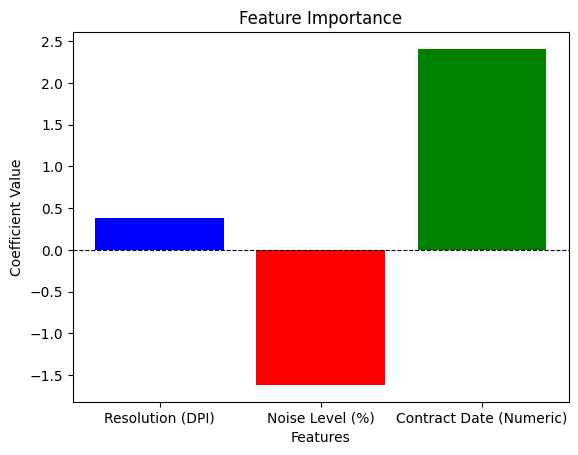

In [ ]:
# Coefficients from logistic regression
features = ["Resolution (DPI)", "Noise Level (%)", "Contract Date (Numeric)"]
coefficients = [0.3784, -1.6187, 2.4071]

plt.bar(features, coefficients, color=["blue", "red", "green"])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.savefig("feature_importance.png")
plt.show()


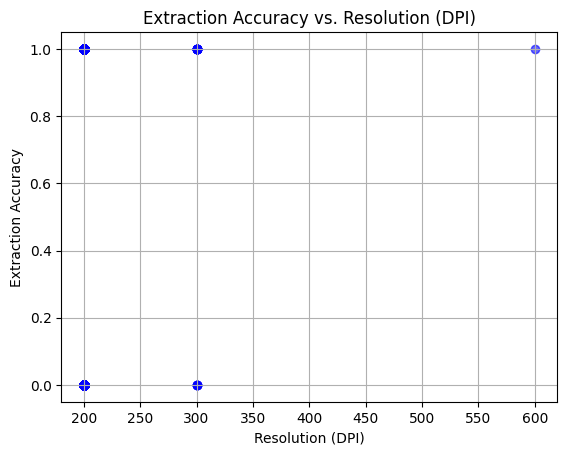

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/drive/My Drive/Filtered_Scaled_Data_with_Original_Values.xlsx"
df = pd.read_excel(data_path)

# Plot Extraction Accuracy vs. Resolution
plt.scatter(df['Original Resolution (DPI)'], df['Extraction Accuracy'], alpha=0.6, color='blue')
plt.title("Extraction Accuracy vs. Resolution (DPI)")
plt.xlabel("Resolution (DPI)")
plt.ylabel("Extraction Accuracy")
plt.grid(True)
plt.show()


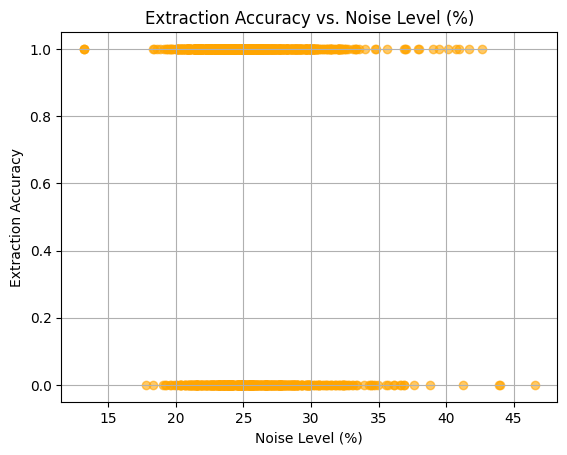

In [ ]:
# Plot Extraction Accuracy vs. Noise Level (%)
plt.scatter(df['Original Noise Level (%)'], df['Extraction Accuracy'], alpha=0.6, color='orange')
plt.title("Extraction Accuracy vs. Noise Level (%)")
plt.xlabel("Noise Level (%)")
plt.ylabel("Extraction Accuracy")
plt.grid(True)
plt.show()


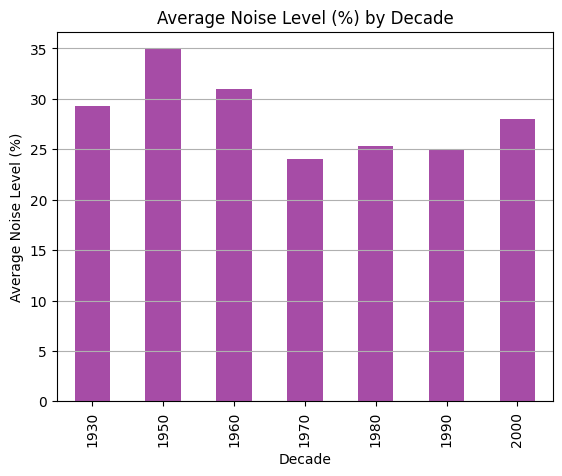

In [ ]:
# Convert Contract Date to Decades
df['Decade'] = (pd.to_datetime(df['Contract Date']).dt.year // 10) * 10

# Calculate average noise level by decade
avg_noise_by_decade = df.groupby('Decade')['Original Noise Level (%)'].mean()

# Plot
avg_noise_by_decade.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Average Noise Level (%) by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Noise Level (%)")
plt.grid(axis='y')
plt.show()


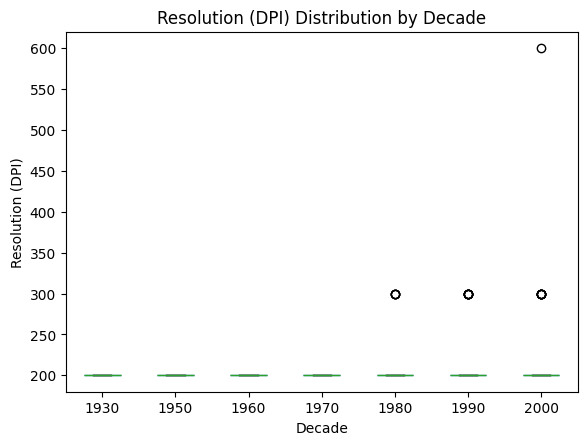

In [ ]:
# Plot Resolution Distribution by Decade
df.boxplot(column='Original Resolution (DPI)', by='Decade', grid=False, patch_artist=True)
plt.title("Resolution (DPI) Distribution by Decade")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("Decade")
plt.ylabel("Resolution (DPI)")
plt.show()


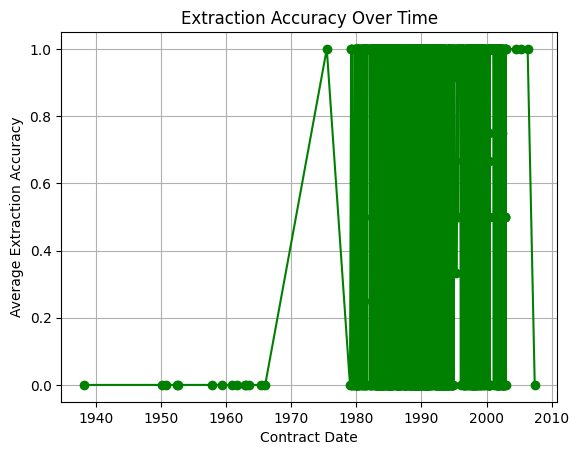

In [ ]:
# Convert Contract Date to datetime
df['Contract Date'] = pd.to_datetime(df['Contract Date'])

# Group by contract date and calculate mean accuracy
accuracy_by_date = df.groupby('Contract Date')['Extraction Accuracy'].mean()

# Plot
plt.plot(accuracy_by_date.index, accuracy_by_date.values, marker='o', color='green', linestyle='-')
plt.title("Extraction Accuracy Over Time")
plt.xlabel("Contract Date")
plt.ylabel("Average Extraction Accuracy")
plt.grid(True)
plt.show()


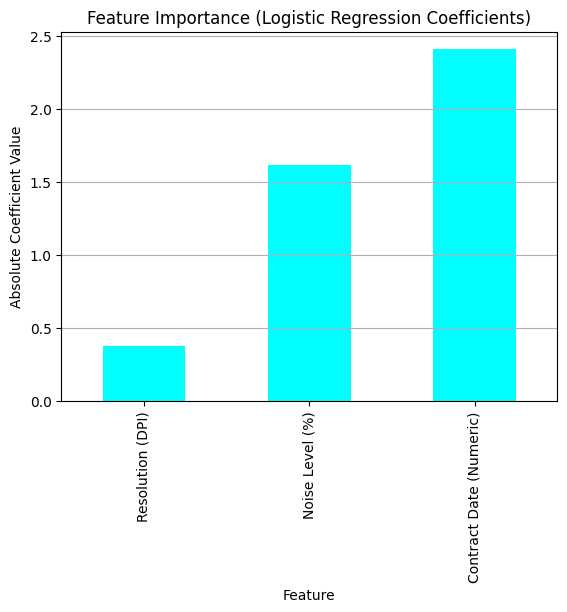

In [ ]:
# Assuming logistic regression model coefficients are stored in a list or dictionary
model_coefficients = {
    'Resolution (DPI)': 0.3784,
    'Noise Level (%)': -1.6187,
    'Contract Date (Numeric)': 2.4071
}

# Convert to DataFrame for plotting
coef_df = pd.DataFrame(list(model_coefficients.items()), columns=['Feature', 'Coefficient'])
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()

# Plot
coef_df.plot(kind='bar', x='Feature', y='Absolute Coefficient', color='cyan', legend=False)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.grid(axis='y')
plt.show()
